In [37]:
import sys
sys.path.append('e:/solar flares/data/2017-09-06')
import numpy as np
import matplotlib.pyplot as plt
import use_nessi as un
import use_nessi2 as un2
from importlib import reload


In [38]:

sr = solar_radius = 959.63
area_factor = 60**2/np.pi/sr**2

def Harps_contrast_plots(names_of_lines_list, data, quiet_sun_subtraction_list, long_names, sst_part=True,
                                title='Contrast profiles', start_of_flare='', shared_colors_row=False, normal=True, vlims=None, 
                                add_noise=True, scale=10):
    
    cols = 3
    rows = len(names_of_lines_list)

    # make figure
    fig, ax = plt.subplots(rows, cols, figsize=(5*cols,4*rows), constrained_layout=True)
    fig.suptitle(title, fontsize=20)
    fig.supylabel(f"Minutes from start of flare {start_of_flare}")
    fig.supxlabel(r"Wavelength [$\AA$]")
    
    time_lim = []
    
    # col 3: Harps data
    un2.acx_coord(ax, 0, 2).set_title("Harps contrast profile")
    for i, name in enumerate(names_of_lines_list):
        
        flare_win, wav_win, time = un2.get_Harps(name)
        if flare_win is not None:
            wav_nessi, dc_nessi, clv_nessi = data[f"nessi_{name}"]
            if "CaK" in name:
                wav_nessi, dc_nessi = wav_nessi[:-1], dc_nessi[:-1]
            W, T = np.meshgrid(wav_win, time)

            decorations={}
            vlim = vlims[name] if vlims is not None else None
            print("Harps: Line", name, vlim)
            un2.ax_contrastplot(fig, un2.acx_coord(ax, i, 2), W, T, flare_win, wav_nessi, dc_nessi, decorations , vlimscale=2/3,
                            seperate_colorbar=True, xlim=(wav_nessi[0], wav_nessi[-1]), vlim=vlim)
        time_lim.append((time[0], time[-1]))

        
    # col 1 : scaled up flare
    ax[0,0].set_title(f"Full disk contrast profile ({scale}x scaled FOV + NESSI)")
    for i, name in enumerate(names_of_lines_list):
        ax[i,0].set_ylabel(long_names[name], size=15)
        scalefactor = scale
        wav, DFD , time, line, std = un2.contrast_FD_data(name,data, quiet_sun_subtraction_list[i],
                                                          area_factor=area_factor*scalefactor, add_noise=False)
        W, T = np.meshgrid(wav, time)

        decorations={}
        if i==0:
            decorations["ylabel"] = f"{scalefactor}x Scaled flare profile"
        vlim = vlims[name] if vlims is not None else None
        print("scaled flare: Line", name, vlim)
        un2.ax_contrastplot(fig, un2.acx_coord(ax, i, 0), W, T, DFD, wav, line, decorations, seperate_colorbar=True, vlim=vlim)
        
        
    # col 2 : scaled up flare + noise as in Harps
    ax[0,1].set_title(f"Full disk contrast profile ({scale}x scaled FOV + NESSI)\n degraded in time + Harpslike noise.")
    for i, name in enumerate(names_of_lines_list):
        
        wav, DFD , time, line, std = un2.degenerate_contrast_as_Harps(name, data, quiet_sun_subtraction_list[i], 
                                                                      area_factor*scalefactor, add_noise=True, scale_noise=0.1)
        print(std)
        W, T = np.meshgrid(wav, time)

        vlim = vlims[name] if vlims is not None else None
        print("scaled flare: Line", name, vlim)
        un2.ax_contrastplot(fig, un2.acx_coord(ax, i, 1), W, T, DFD, wav, line, decorations={}, seperate_colorbar=True, vlim=vlim)
        
    for i in range(2):
        for j in range(3):
            ax[i, j].set_ylim(time_lim[i])


    # plt.tight_layout()
    plt.show()
            

    figname="contrastplot_Harps"
    fig.savefig(f'E:\solar flares\data\\full_analysis\\full_plots\{figname}.png')


Harps: Line Ha17 None
Harps: Line CaK17 None
scaled flare: Line Ha17 None
scaled flare: Line CaK17 None
[5.13709403e-13 5.10492716e-13 5.07257223e-13 5.04228868e-13
 5.01849796e-13 4.99448089e-13 4.97023425e-13 4.94575470e-13
 4.92144080e-13 4.89941571e-13 4.87714919e-13 4.85463725e-13
 4.83187580e-13 4.80913938e-13 4.79846134e-13 4.78760564e-13
 4.77656781e-13 4.70591294e-13 4.57411468e-13 4.45828480e-13
 4.34131131e-13 4.22117414e-13 4.09774320e-13 3.97088115e-13
 3.90351284e-13 3.84662508e-13 3.78627222e-13 3.72212772e-13
 3.65382268e-13 3.59799491e-13 3.59332507e-13 3.66387481e-13
 3.76425606e-13 3.88324974e-13 4.01196655e-13 4.14400480e-13
 4.27145544e-13 4.37636980e-13 4.43046507e-13 4.41567626e-13
 4.45738371e-13 4.65341257e-13 4.83480982e-13 4.99154019e-13
 5.12823767e-13 5.31767814e-13 5.57620870e-13 5.81530286e-13
 6.03100948e-13 6.21788965e-13 6.39921752e-13 6.55963230e-13
 6.66925949e-13 6.74096750e-13 6.76988266e-13 6.86729786e-13
 7.00276593e-13 7.07259797e-13 7.07306991e

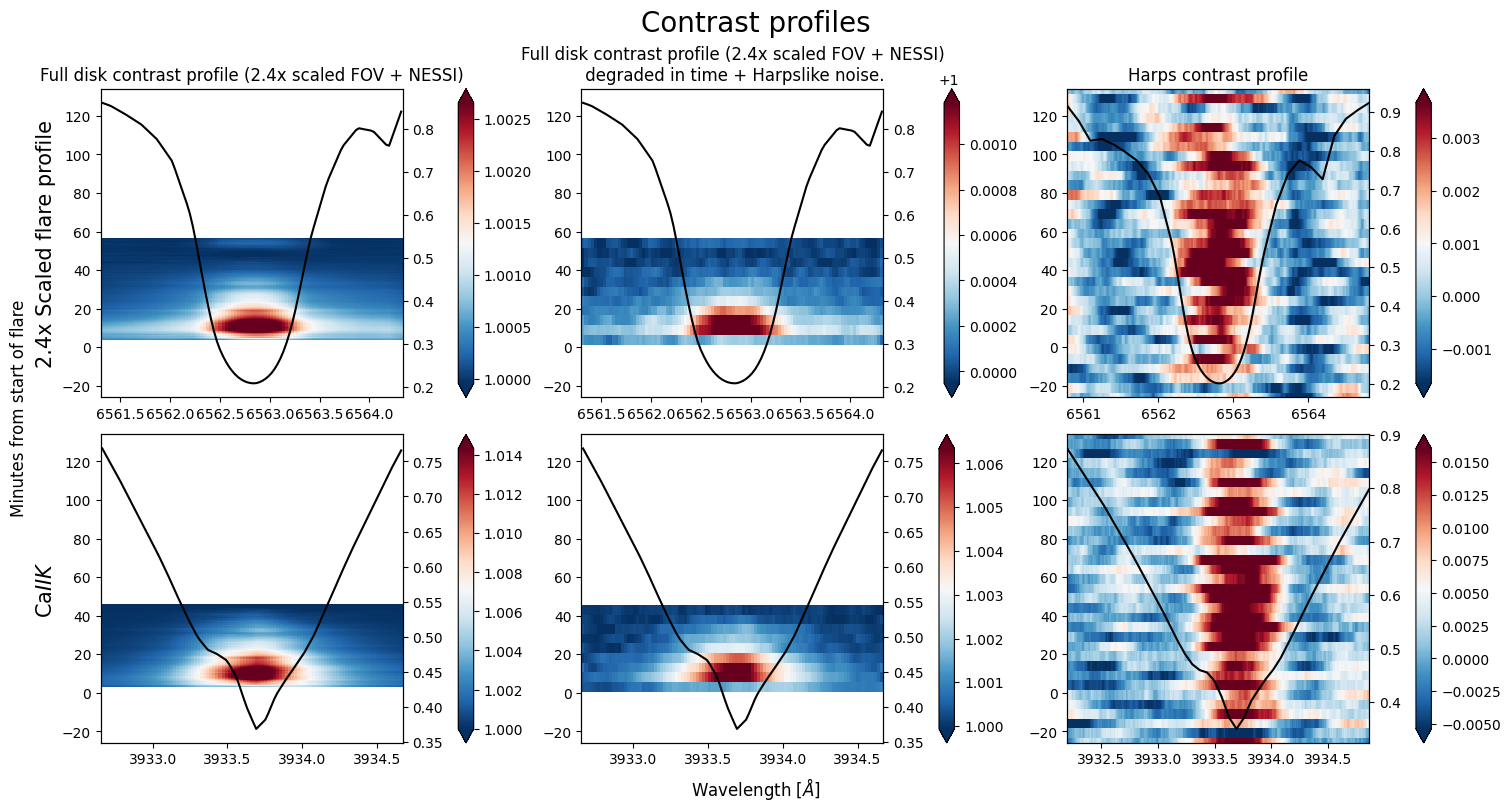

Harps: Line Ha17 None
Harps: Line CaK17 None
scaled flare: Line Ha17 None
scaled flare: Line CaK17 None
[1.80150305e-16 1.79022260e-16 1.77887620e-16 1.76825621e-16
 1.75991316e-16 1.75149073e-16 1.74298778e-16 1.73440317e-16
 1.72587664e-16 1.71815277e-16 1.71034423e-16 1.70244962e-16
 1.69446752e-16 1.68649419e-16 1.68274956e-16 1.67894263e-16
 1.67507182e-16 1.65029420e-16 1.60407450e-16 1.56345467e-16
 1.52243379e-16 1.48030346e-16 1.43701805e-16 1.39252940e-16
 1.36890433e-16 1.34895464e-16 1.32778978e-16 1.30529525e-16
 1.28134168e-16 1.26176370e-16 1.26012606e-16 1.28486681e-16
 1.32006904e-16 1.36179836e-16 1.40693745e-16 1.45324131e-16
 1.49793637e-16 1.53472829e-16 1.55369870e-16 1.54851248e-16
 1.56313867e-16 1.63188310e-16 1.69549644e-16 1.75045947e-16
 1.79839725e-16 1.86483123e-16 1.95549408e-16 2.03934087e-16
 2.11498600e-16 2.18052212e-16 2.24411112e-16 2.30036622e-16
 2.33881086e-16 2.36395780e-16 2.37409792e-16 2.40825999e-16
 2.45576664e-16 2.48025571e-16 2.48042121e

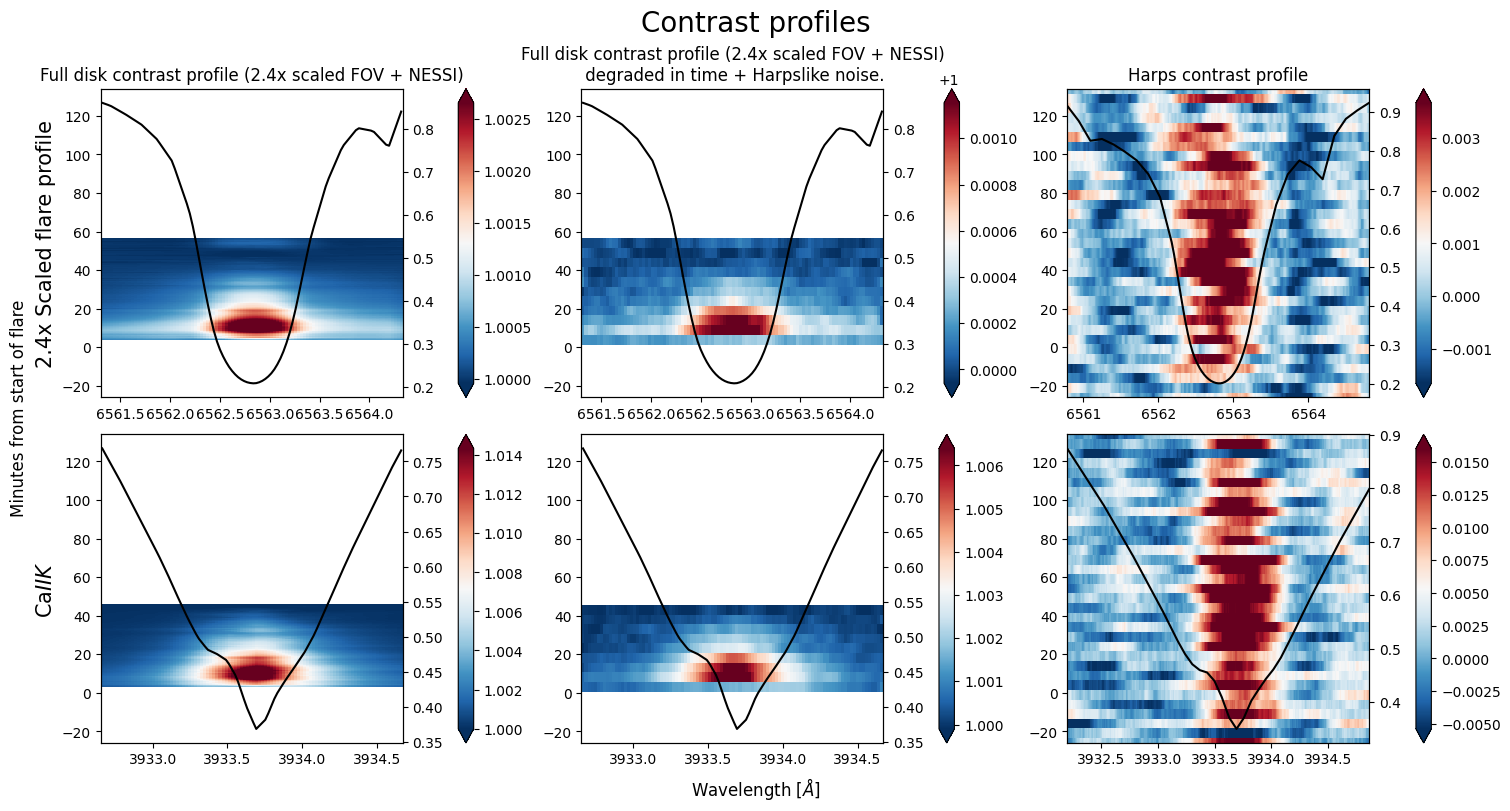

In [39]:
reload(un2)
reload(un)
lines = ["Ha17", "CaK17"]
long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}


data = un.load_for_further_analysis(lines)
un2.disgard_cont_point("CaK17", data)
qs_sub = [False, False, False]
# vlims = {"Ha17":0.006, "CaK17":0.04, "CaII17":0.01}


# un2.Create_flare_contrast_plots(lines, data, qs_sub, long_names, Harps=True, scale_up=True, 
#                             title='Contrast profiles X9.3 flare', start_of_flare="11:56", add_noise=True, scale=3)
Harps_contrast_plots(lines, data, qs_sub, long_names, title='Contrast profiles', start_of_flare='', shared_colors_row=False, 
                     normal=True, vlims=None, add_noise=True, scale=2.4, sst_part=True)
Harps_contrast_plots(lines, data, qs_sub, long_names, title='Contrast profiles', start_of_flare='', shared_colors_row=False, 
                     normal=True, vlims=None, add_noise=True, scale=2.4, sst_part=False)

**Caption**: Procedure to obtain HARPS-like contrast profiles from FOV observations of SST for \Halpha (upper row) and \CaK (lower row). \textbf{1st column:} FOV contrast profiles obtained by integration over FOV and quiet sun subtraction. \textbf{2nd column:} Full disk contrast profiles by NESSI. \textbf{3th column:} Degenerate in time to match HARPS cadence (5 min) and HARPS-like noise added. This noise was standard normal distributed with standard deviation obtained from the wings of the HARPS spectra. \textbf{4th column:} The observed HARPS spectra for the \Halpha and \CaK (only two available lines) of the same event, the X9.3 flare. HARPS takes 1 pixel measurements, i.e. a true sun-as-a-star observer for comparison with the NESSI obtained result. 

**Explanation:** HARPS, [give specifications or refer to introduction] captured the X9.3 flare in the \Halpha and \CaK lines with a 5 minute cadence. In \autoref{} we simulated a HARPS observation of the X9.3 flare. We constructed virtual full disk spectrum from the SST observations for the event in the two lines and denegraded it in time to a 5 minute cadence. Thereafter we derived the standard deviation for noise in the HARPS spectra wings and added similar noise to the time degraded spectra. the virtual HARPS profile and the true HARPS profile are plotted next to each other for comparizon. Here it seems that are some fundamental diffenceses as the virtual profile decays after 5 minutes into the flare while the peads of the true profiles have there peak starting from 40 minutes. A probable cause for this phenomena is the partial capture of the flare by SST. The more intense regions later in the flare were indeed outside the FOV. However the general beheaviour agree for both lines though the linear scaling to account for the partial capture misses a significant part of the apparent phenomena. 


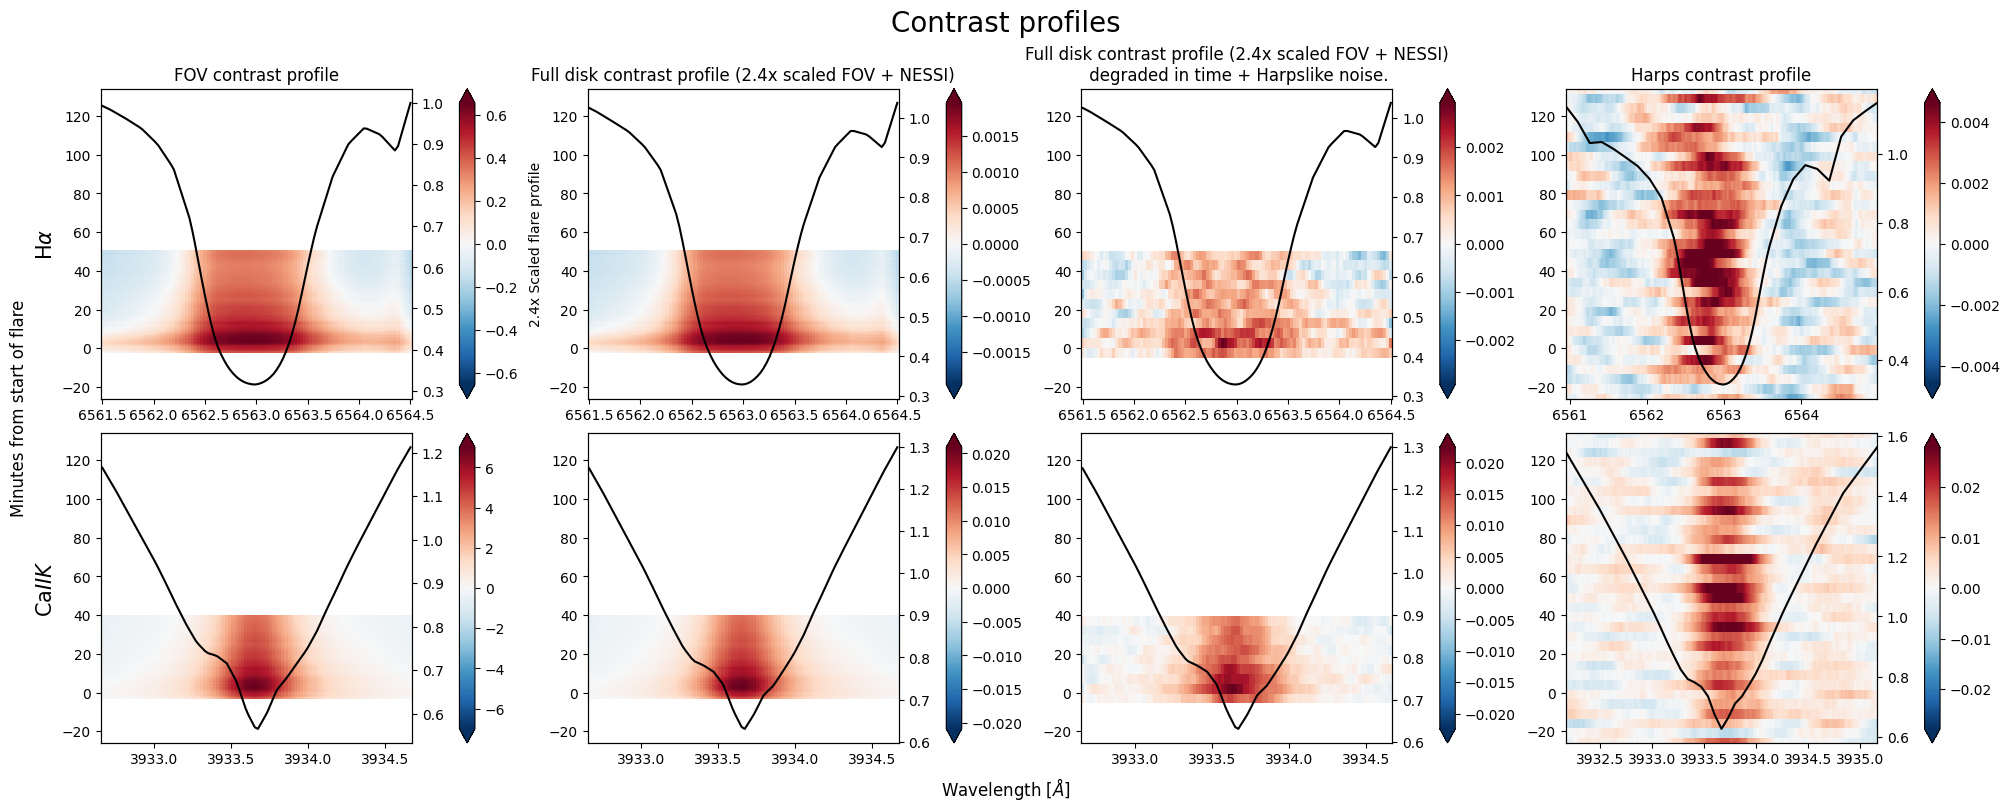

In [40]:
un2.noise_alike_harps("Ha17", (5, 8), backup=1, scale_noise=1)

array([[-1.34995325e-03,  2.94770067e-04,  9.62229941e-04,
        -3.61644500e-04,  7.14203917e-04,  2.74732021e-04,
        -1.18717756e-03, -1.85420995e-03],
       [ 4.38225223e-04,  1.29129693e-03,  4.57248404e-04,
        -5.05381952e-04,  1.11963761e-03, -4.93718612e-05,
         6.31820962e-04, -6.93493081e-04],
       [ 5.64215494e-04,  3.92086681e-04,  1.02801805e-03,
        -4.01670567e-04, -6.95830429e-05,  4.80173284e-04,
        -4.63280901e-04,  3.37714268e-04],
       [-2.99622032e-05,  9.27354883e-04,  3.24997168e-04,
         6.26415696e-04,  8.34959397e-04, -2.35731580e-04,
        -3.87335033e-04, -2.93004831e-04],
       [ 7.71495731e-04, -4.47904547e-04, -1.31107794e-03,
        -7.03456595e-04, -4.75662975e-04, -2.99861291e-04,
         8.95687333e-04, -1.94850789e-04]])

In [41]:
un2.noise_alike_harps("Ha17", (5, 8), backup=1, scale_noise=100)

array([[-0.08839909, -0.12230849,  0.0545522 ,  0.084288  ,  0.01304289,
         0.06366255,  0.00671954, -0.16762682],
       [-0.06998377,  0.01529998,  0.05021751,  0.04620111,  0.1549406 ,
        -0.00739899,  0.00633545, -0.09424085],
       [ 0.07340979, -0.00696036, -0.04706691, -0.08967153, -0.02179424,
         0.03014175,  0.10909881,  0.04506506],
       [-0.03180053, -0.1841382 ,  0.00547168, -0.02125367,  0.00307581,
         0.10882079,  0.06051207,  0.12304093],
       [ 0.11305795,  0.08338166,  0.13042091, -0.02671128, -0.00865885,
        -0.02694778,  0.03918518,  0.04964681]])